<img src="images/hierarcy.png" alt="drawing" width="1000"/>

# **Hierarchical Clustering**

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AgglomerativeClustering

In [104]:

data = pd.read_csv("data/cluster_mpg.csv")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


For this machine learning model we require only numeric data, so we can turn the origin column into dummy variables (as there are only 3 origin possibilities). We can drop the "name" column as this is a unique identifier for each car, which will not help in a clustering algorithm. 

In [105]:
data['origin'].value_counts()

origin
usa       245
japan      79
europe     68
Name: count, dtype: int64

In [106]:
data = data.drop('name', axis='columns')
data = pd.get_dummies(data)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True


As can be seen below, the order of magnitude and spread of the different features varies substantially. The Hierarchical Clustering algorithm is based on finding similarities between data points, which is why it is important to scale the data. 

In [107]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


Because the algorithm is interested in the distance between two points, it is useful to use a min/max scaler as this will make sure values are between 0 and 1 and not negative. 

The standard scaler simply scales all datapoints such that the mean is 0 and the standard deviation is 1. This will still allow negative values to appear. 

In [108]:
scaler = MinMaxScaler()
X = scaler.fit_transform(data)

In [109]:
X_df = pd.DataFrame(X, columns=data.columns)
X_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,0.239362,1.0,0.617571,0.456522,0.536150,0.238095,0.0,0.0,0.0,1.0
1,0.159574,1.0,0.728682,0.646739,0.589736,0.208333,0.0,0.0,0.0,1.0
2,0.239362,1.0,0.645995,0.565217,0.516870,0.178571,0.0,0.0,0.0,1.0
3,0.186170,1.0,0.609819,0.565217,0.516019,0.238095,0.0,0.0,0.0,1.0
4,0.212766,1.0,0.604651,0.510870,0.520556,0.148810,0.0,0.0,0.0,1.0


We can explore the features X by plotting them in a heatmap. In the figure below the vertical axis represents the rows, the horizontal axis the columns.

Observations
* The dummy variables can be seen to be either black (0) or white (1)
* It turns out that the dataset is ordered by model year, which explains the smooth gradient.

<Axes: >

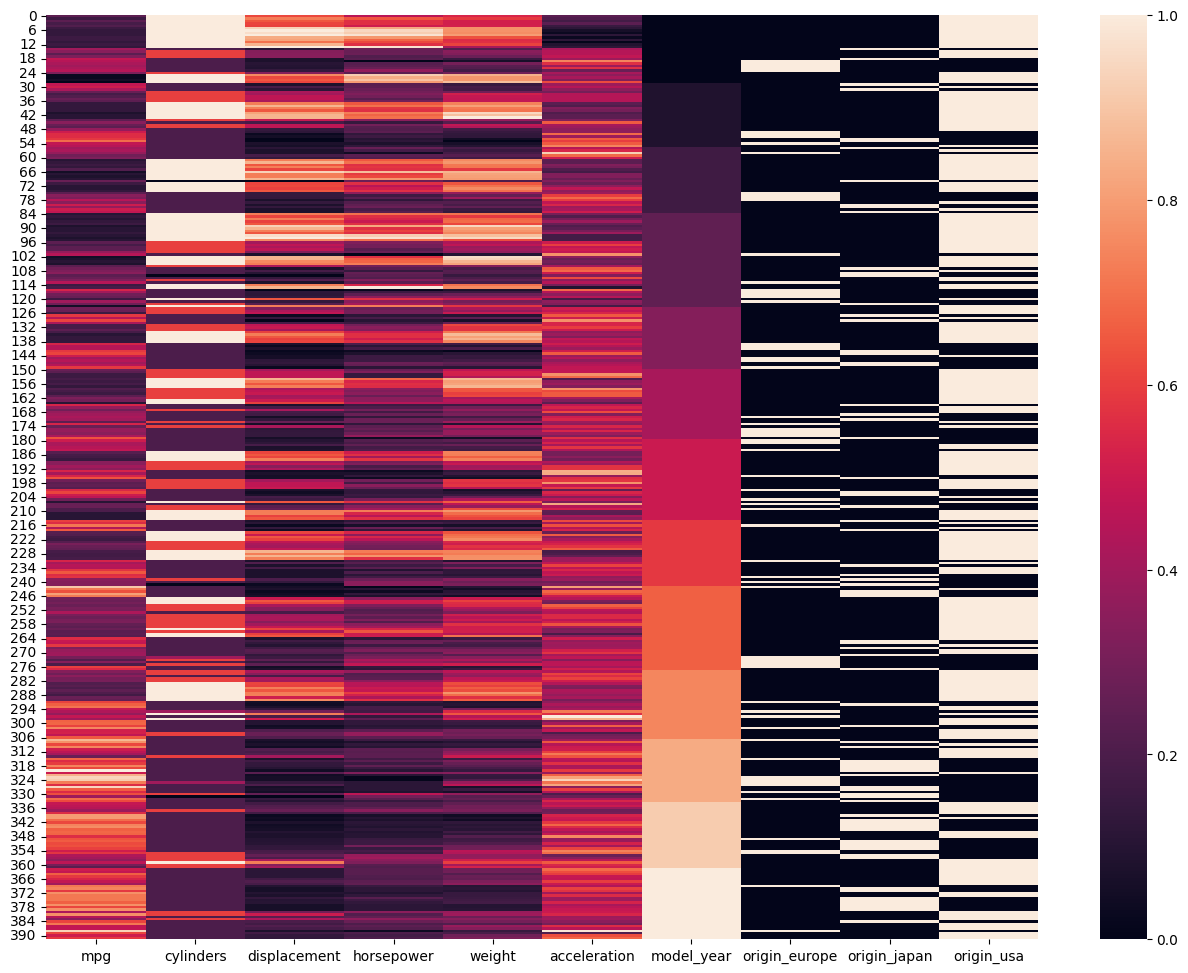

In [110]:
plt.figure(figsize=(16, 12))
sns.heatmap(X_df)

The problem with the heatmap is that you cannot compare the feature columns. All of the values have been scaled to be between 0 and 1, which is great for the algorithm, but doesn't say much about the features themselves. 

You are not really interested in clustering columns (that tells you how similar features are, which can be done more efficiently using correlation). You want to cluster the rows (for example what cars are similar?)

<Axes: >

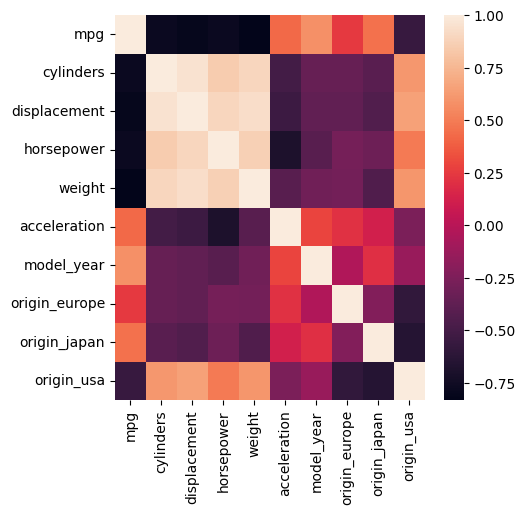

In [111]:
plt.figure(figsize=(5, 5))
sns.heatmap(X_df.corr())

From the Clustermap you can see that seaborn groups the cars in the following way
* first by USA/non-USA
* Then by EU/Japan
* Then by cylinders

This gives a good indication what features are most important for grouping similar cars together. 

<Figure size 1600x1200 with 0 Axes>

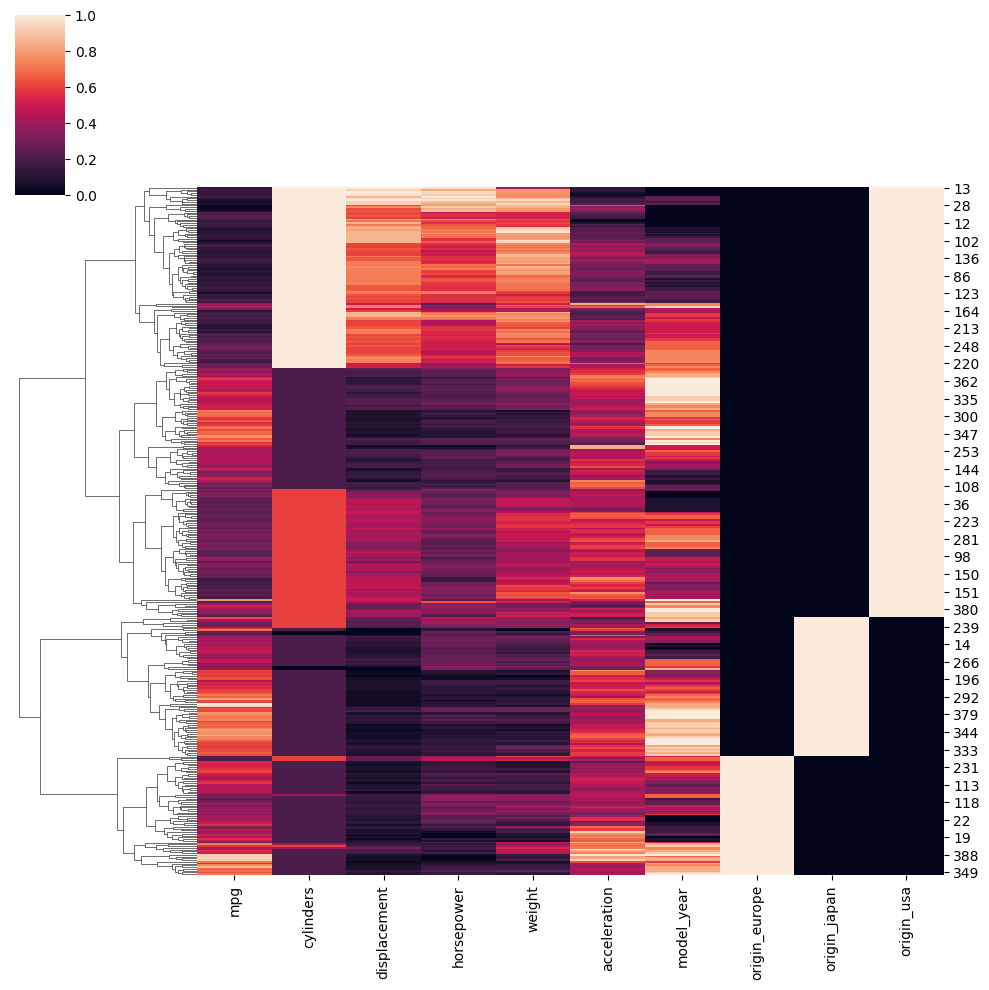

In [112]:
plt.figure(figsize=(16, 12))
sns.clustermap(X_df, col_cluster=False)

## Clustering Based on Number of Clusters

Based on the clustermap above we could determine we want to group our data into 4 clusters

In [113]:
model = AgglomerativeClustering(n_clusters=4)
cluster_labels = model.fit_predict(X)
cluster_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 0, 0, 3, 2, 2, 2,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 2, 0, 3, 3, 0, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 0, 3, 0, 3,
       3, 0, 0, 2, 1, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 0, 3, 0, 3, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 0, 2, 2, 3, 3, 2, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 3, 2, 3, 0, 2, 0, 2,
       2, 2, 2, 3, 2, 2, 0, 0, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 3, 0,
       0, 0, 0, 2, 3, 3, 0, 2, 1, 2, 3, 2, 1, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 0, 3, 0, 0, 0, 3, 2, 3, 2, 3,
       2, 0, 3, 3, 3, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 3, 3, 0, 3, 0, 0, 3, 2, 2, 2, 2, 2, 3, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 3, 0, 0, 2, 1, 2, 1, 0, 0,

As there are 10 features, we cannot plot the grouped clusters in a graph, but we can create scatter plots to get an insight into how the data is clustered. 

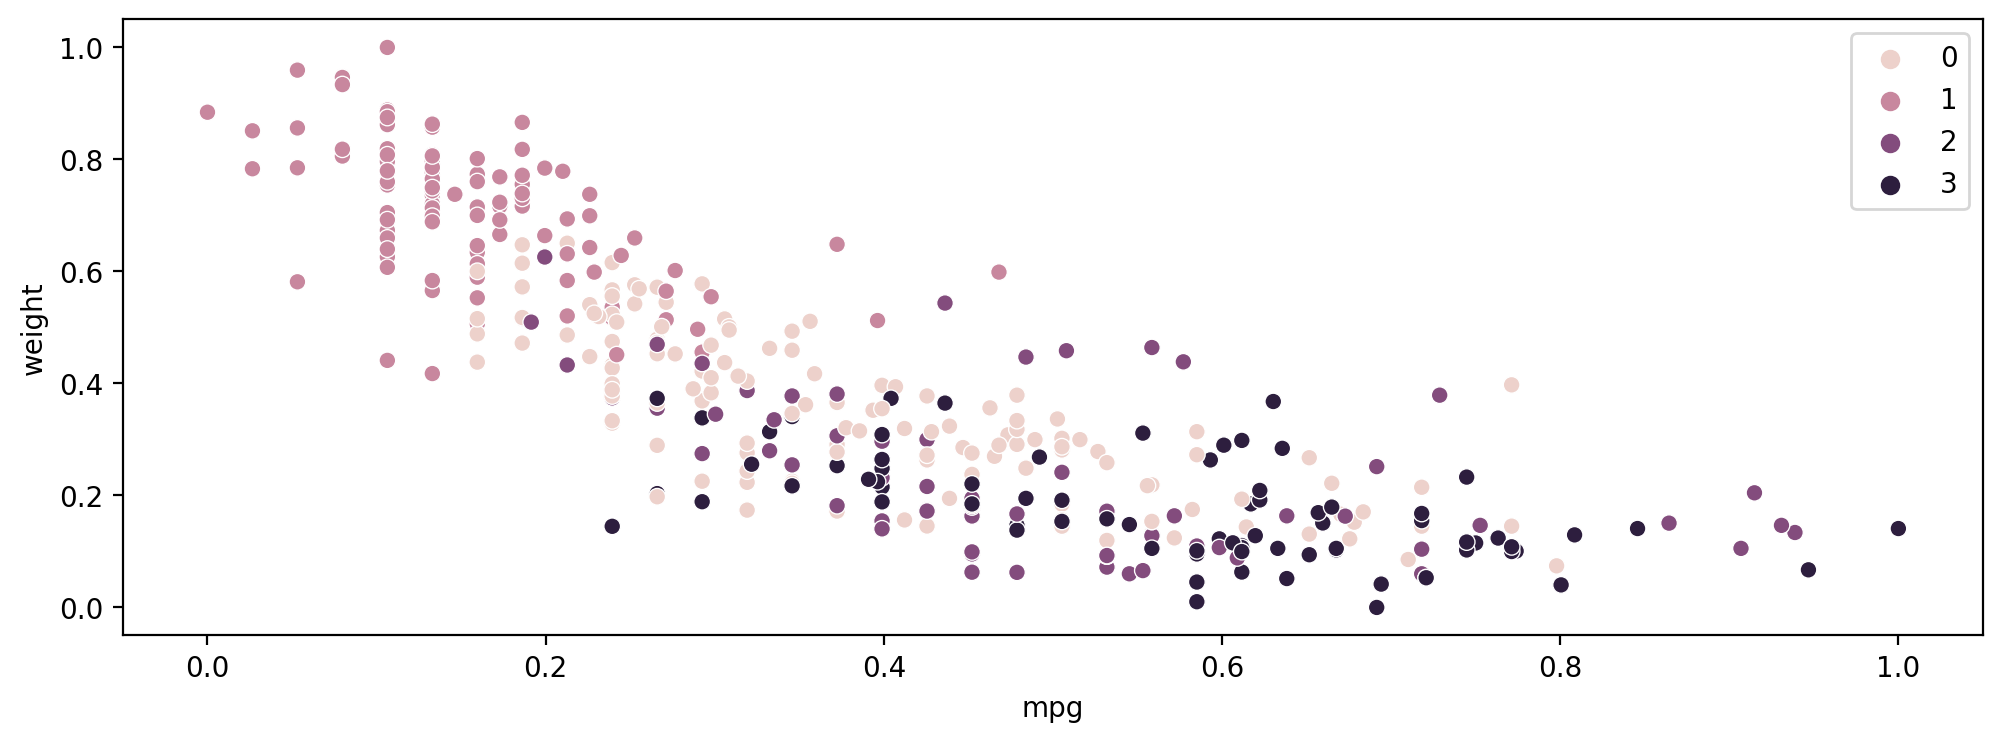

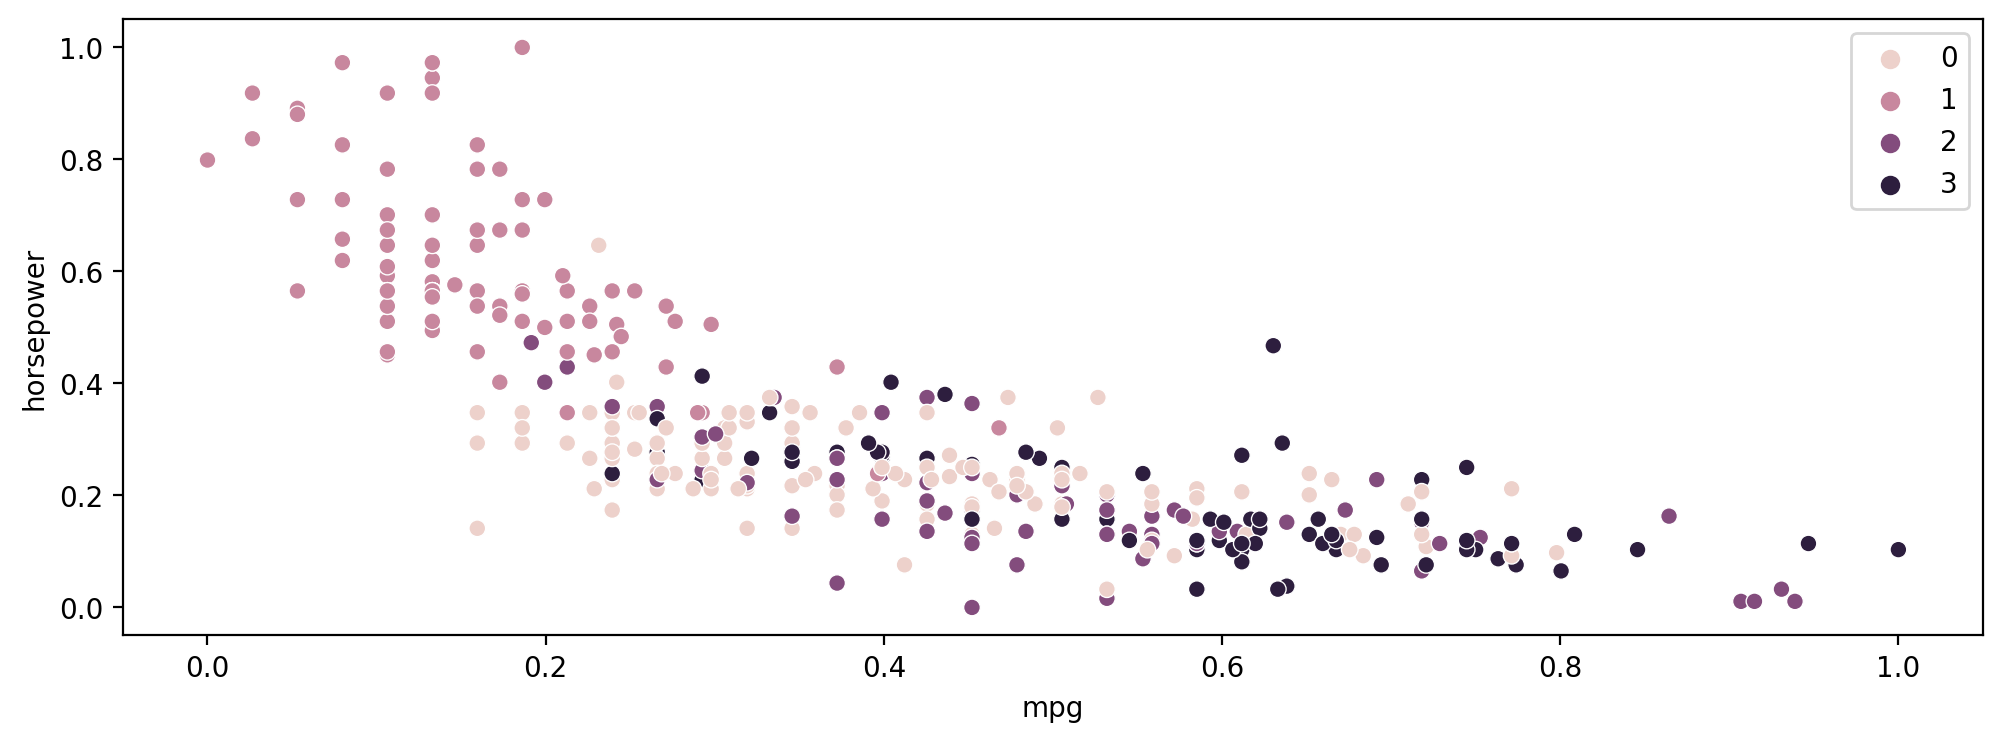

In [114]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(data=X_df, x='mpg', y='weight', hue=cluster_labels)
plt.show()

plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(data=X_df, x='mpg', y='horsepower', hue=cluster_labels)
plt.show()

### Dendogram

From the SciPy Python package we can can use the <code>linkage</code> function in order to see how the model created the clusters. Each row in the linkage matrix has the following components:

[cluster_A, cluster_B, similarity/distance, number_of_points_in_linkage]

It should be noted that the dissimilarity between clusters (bottom of matrix) can be much larger for clusters than for individual points. For individual points it is the maximum distance computed above. For clusters it depends on the type of linkage used to compare clusters. 

In [125]:
linkage_matrix = linkage(model.children_)
linkage_matrix

array([[ 67.        , 161.        ,   1.41421356,   2.        ],
       [ 10.        ,  45.        ,   1.41421356,   2.        ],
       [ 47.        ,  99.        ,   1.41421356,   2.        ],
       ...,
       [340.        , 777.        ,  56.40035461, 389.        ],
       [332.        , 778.        ,  58.69412236, 390.        ],
       [349.        , 779.        ,  75.32595834, 391.        ]])

We can use a dendogram to visualize all the possible clusters. We can play around with this plot in order to try out different truncation points, in order to go back and tweak the hyperparameter "n_clusters" of the model. If all other hyperparameters remain the same, then the dendogram will look the same, the hyperparameter "n_clusters" only determines where to truncate the dendogram, and then assign the predicted labels to the data. 

The horizontal axis of the dendogram represents the clusters, but their labels are not very useful as they are arbitrary cluster names, not the final clusters "predicted" by the model. 


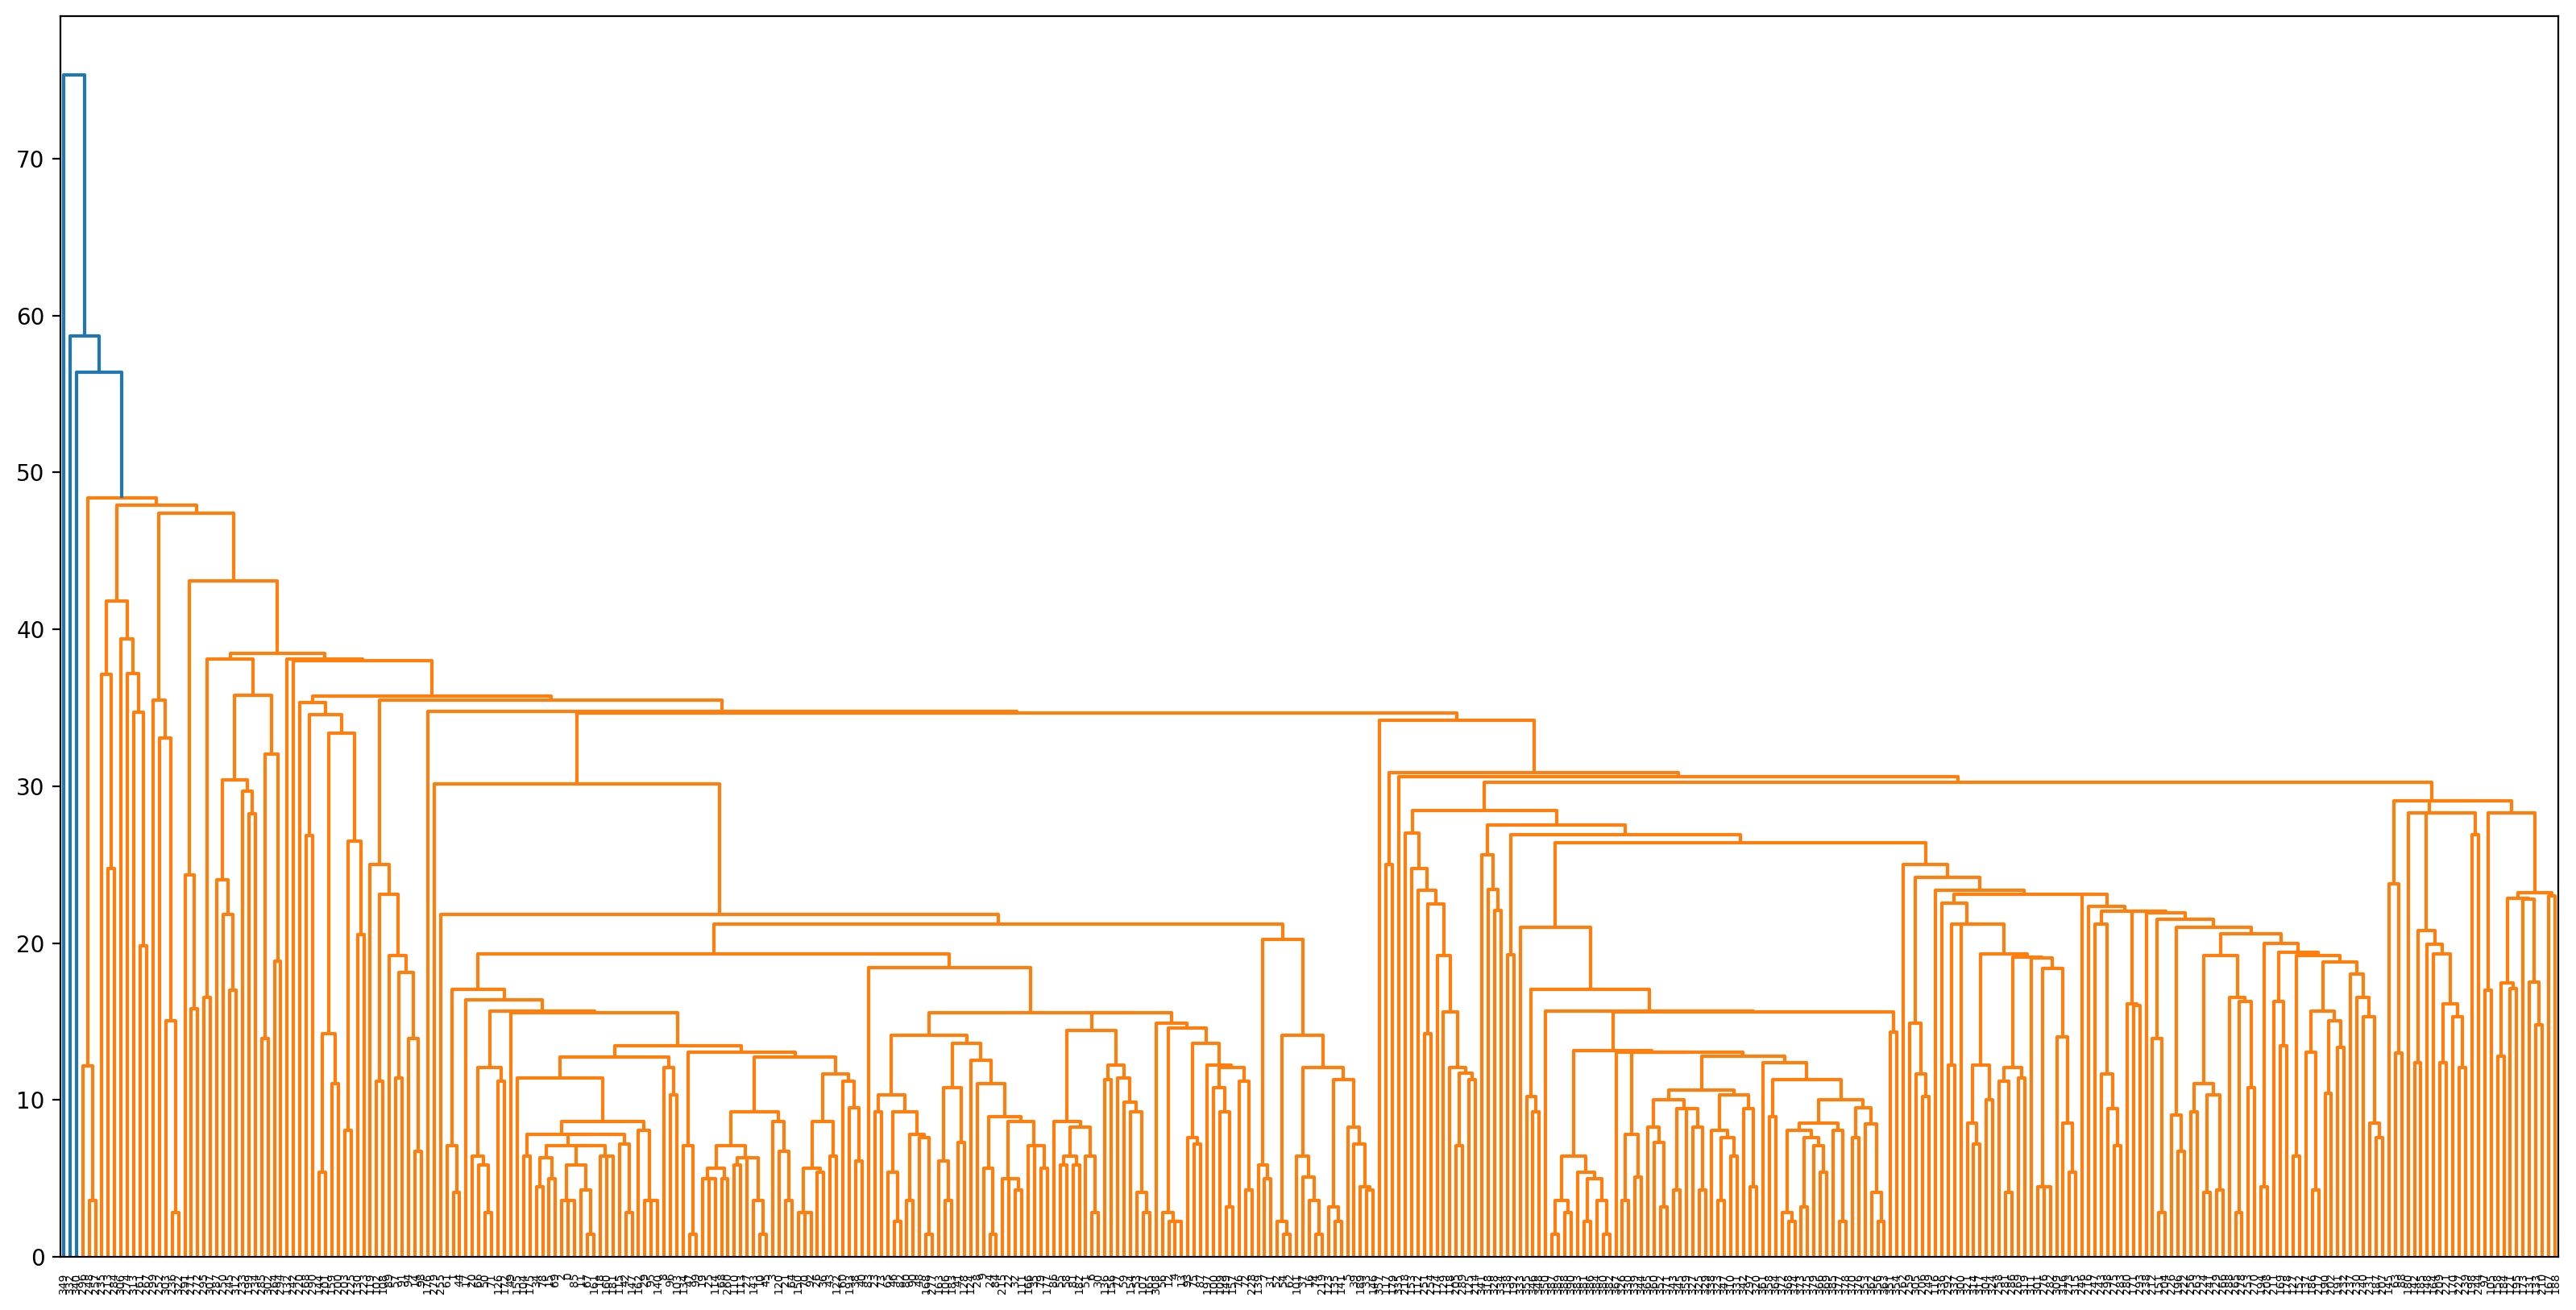

In [126]:
plt.figure(figsize=(20,10), dpi=200)
dendrogram(linkage_matrix)
plt.show()

For example you can show the dendagram for $p$ number of clusters

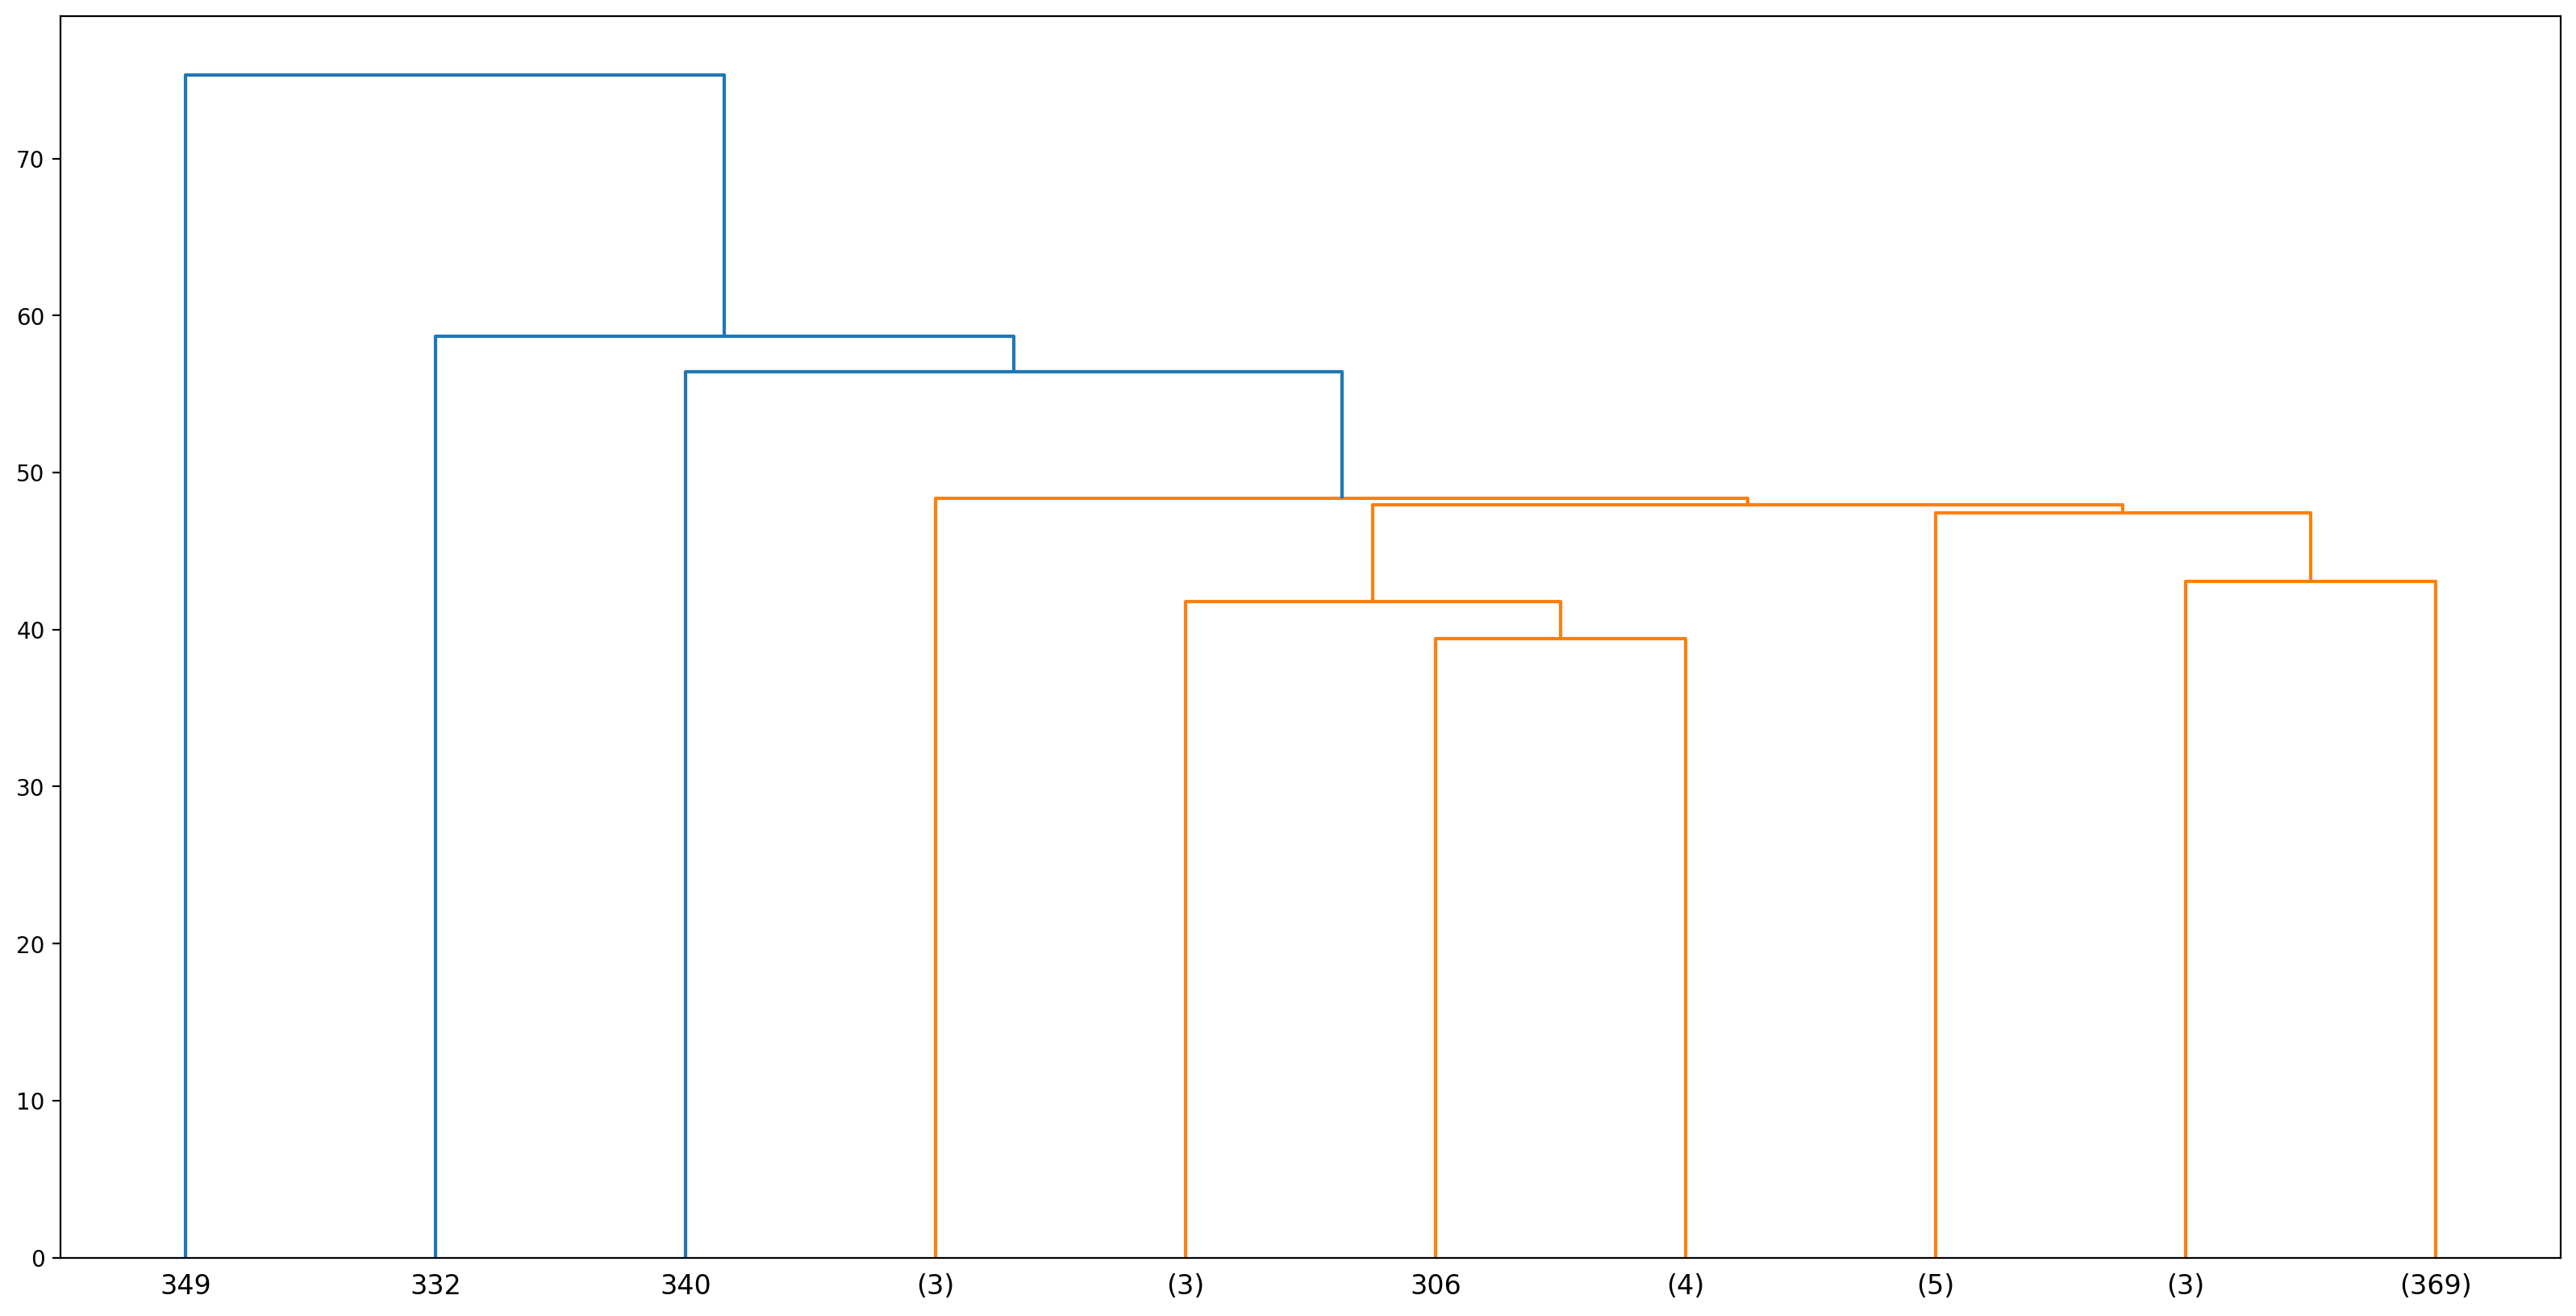

In [116]:
plt.figure(figsize=(20,10), dpi=200)
dendrogram(linkage_matrix,truncate_mode='lastp', p=10)
plt.show()

Alternatively you can say that you want $n + 1$ number of splits

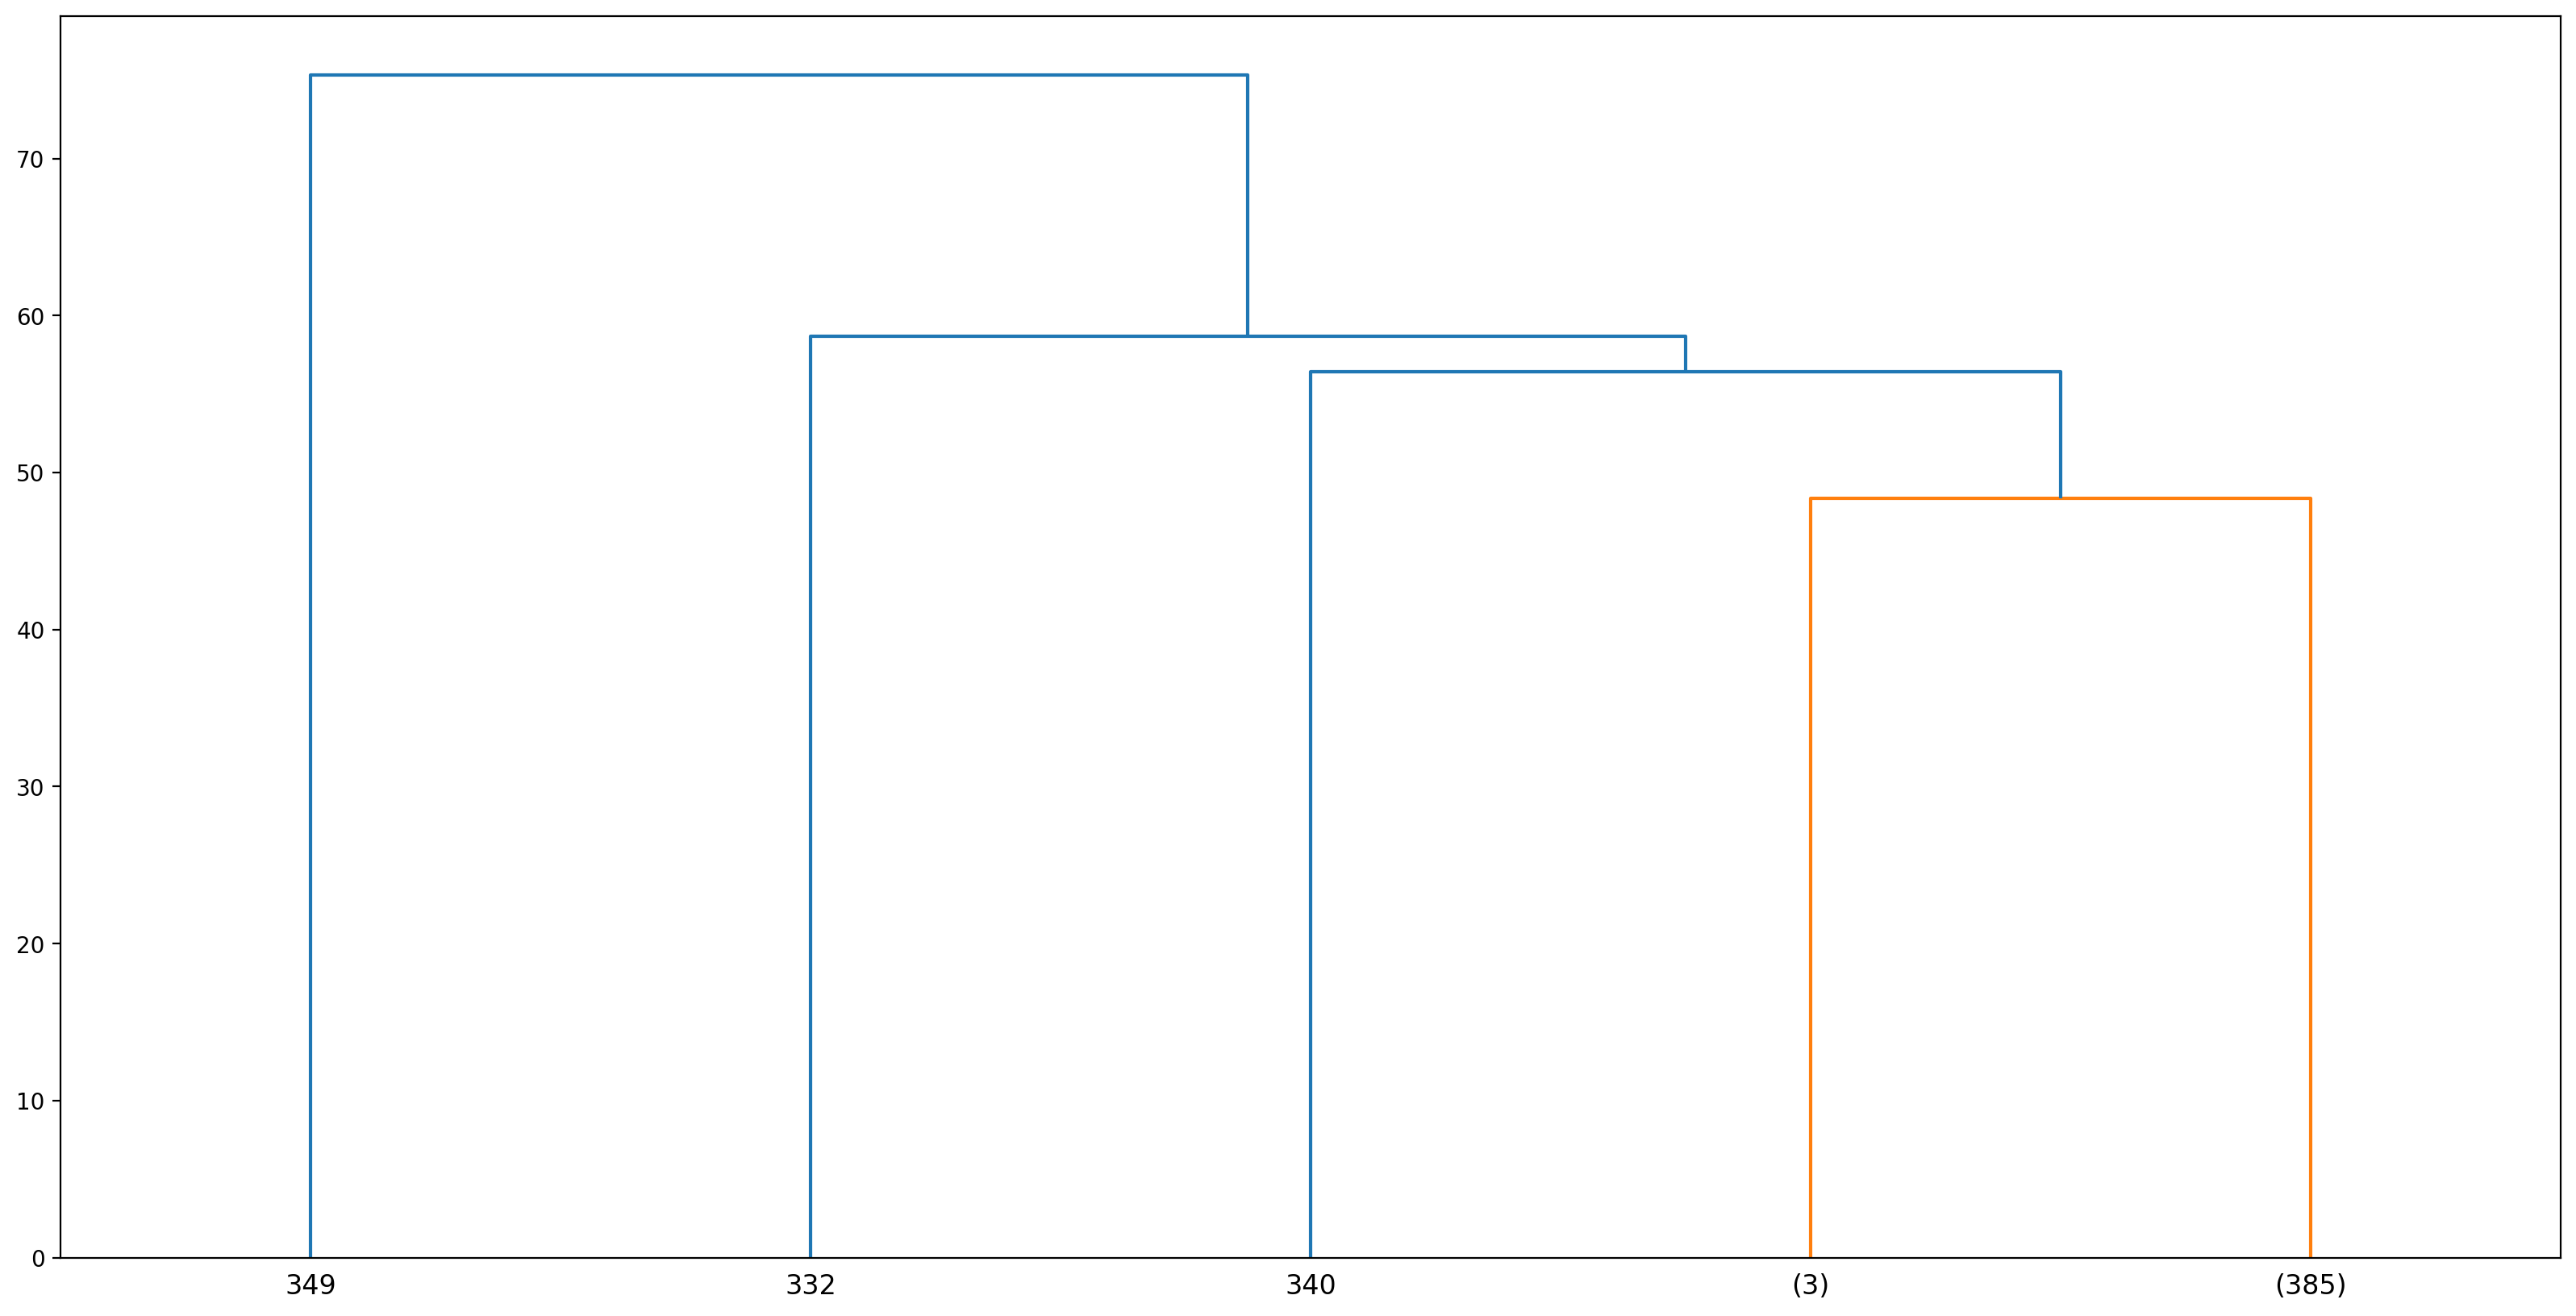

In [117]:

plt.figure(figsize=(20,10), dpi=200)
dendrogram(linkage_matrix,truncate_mode='level', p=3)
plt.show()

## Clustering Based on Similarity

One of the hyperparameters of the model is the "distance threshold", which is the minimum distance two points should be to eachother in order to allow them to merge. If the distance between two points is too great we do not merge, and the algorithm ends. 

This hyperparameter is an alternative to specifying the number of clusters beforehand. If you specify the distance threshold to be zero, then each data point will belong to its own cluster. This is equivalent to truncating the dendogram at the bottom. 

With the n_clusters you start at the top and determine where to truncate. With distance_threshold you start at the bottom and determine if the clusters at that level are allowed to be merged. If the distance exceeds the distance_threshold then the clusters are dissimilar enough that we can choose those as our final clusters. 

In [120]:
model = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
cluster_labels = model.fit_predict(X)
cluster_labels

array([247, 252, 360, 302, 326, 381, 384, 338, 300, 279, 217, 311, 377,
       281, 232, 334, 272, 375, 354, 333, 317, 345, 329, 289, 305, 383,
       290, 205, 355, 269, 202, 144, 245, 297, 386, 358, 199, 337, 330,
       339, 293, 352, 283, 196, 253, 168, 378, 331, 201, 268, 256, 361,
       250, 197, 246, 371, 324, 230, 203, 261, 380, 376, 308, 389, 332,
       306, 236, 391, 350, 274, 288, 313, 231, 298, 100, 295, 210, 248,
       187, 390, 373, 266, 307, 379, 212, 357, 191, 314, 208, 249, 343,
       294, 374, 322, 323, 362, 188, 296, 369, 286, 251, 229, 244, 285,
       349, 365, 259, 213, 276, 215, 222, 204, 359, 287, 166, 387, 291,
       220, 216, 260, 129, 367, 340, 346, 301, 342, 228, 388, 370, 218,
       255, 327, 347, 278, 271, 258, 282, 318, 273, 123, 172, 382, 363,
       356, 195, 280, 239, 364, 267, 351, 186, 257, 277, 299, 127, 366,
       234, 385, 192, 372, 292, 233, 270, 263, 133, 165, 161, 198,  97,
       315, 134, 207, 147, 175, 262, 348,  98, 214,  48, 353, 17

### Choosing a Minimum Distance

In [129]:
X_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.173469,0.201531,0.625000
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.379136,0.401656,0.484742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,0.000000,0.000000
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,0.000000,1.000000
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


When using the euclidean distance on a data set of $p$ features, the distance between points A and B is computed is a simply

$$d^2 = \sum_i^p (X_{i, A} - X_{i, B})^2$$

If you scale the results, such that each features value has a maximum of 1.0, then the maximum distance is simply

$$d^2_{max} = \sum_i^p (1 - 0)^2$$

$$ d_{max} = \sqrt{p}$$

In the case of the data set in this noteboke, the max distance is given by

In [118]:
p = len(X_df.columns)
d_max = round(np.sqrt(p), 2)
print(f"p = {p}")
print(f"d_max = {d_max}")

p = 10
d_max = 3.16


This is only the theoretical maximum distance between a car that has 0 for all features (lowest weight, lowest mpg, lowest horsepower, etc.) and a car that has 1 for all features (highest weight, highest mpg, highest horsepower, etc.)

These two maximums most likely do not actually exist, as certain features are negatively correlated. For example cars with lower weight tend to be more efficient and thus have higher mpg; the car with the lowest weight will most likely not have the highest mpg. 

To remedy this we can look at the max distance of individual features. We can take a feature that is spread quite wide, for example the the mpg feature, and determine the largest distance between the smallest and largest car. 

In [128]:
idx_min = X_df['mpg'].idxmin()
idx_max = X_df['mpg'].idxmax()

car_min = X_df.iloc[idx_min]
car_max = X_df.iloc[idx_max]

distance = np.linalg.norm(car_max - car_min)
print(f"d_max = {round(distance, 2)}")

d_max = 2.39


As stated in the dendogram section, these maximum distances are only a measure of the similarity of individual data points. The similarity of clusters is calculated differently depending on the chosen linkage criterion, and may actually be much larger. However the maximum values calculated above can give you an idea of the order of magnitude for distance_threshold should you choose to tweak this hyperparameter.  